In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data tidying and Cleaning

## Live Demos

\# This is not included in the materials from SoftUni:

Now we read the data:

In [3]:
coffee_data = pd.read_csv("merged_data_cleaned.csv")

In [4]:
coffee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


Виждаме, че имаме много на брой колони и сравнително малко на брой записи. Нямаме огромен дейта сет, но имаме много атрибути към него, т.е. огромен брой колони.

И ако започнем да гледаме всяка една колона ще започнем да виждаме различни особености, проблеми и т.н.

In [5]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [6]:
coffee_data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

Тези данни уж са почистени, но всъщност не са много почистени.

Ако напиша "Altitude" започваме да виждаме всякакви неща:

In [7]:
coffee_data["Altitude"]

0           1950-2200
1           1950-2200
2       1600 - 1800 m
3           1800-2200
4           1950-2200
            ...      
1334              NaN
1335               40
1336       795 meters
1337              NaN
1338              NaN
Name: Altitude, Length: 1339, dtype: object

Като поискаме уникалните стойности започваме да се хващаме малко за главата. Някъде между тиретата има интервали, другаде няма. Някъде пише m(metres), другаде има липсващи стойности. Някъде имаме минимум и максимум стойност, другаде имаме само една стойност. 

In [8]:
coffee_data["Altitude"].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

Може да си направим хистограма:

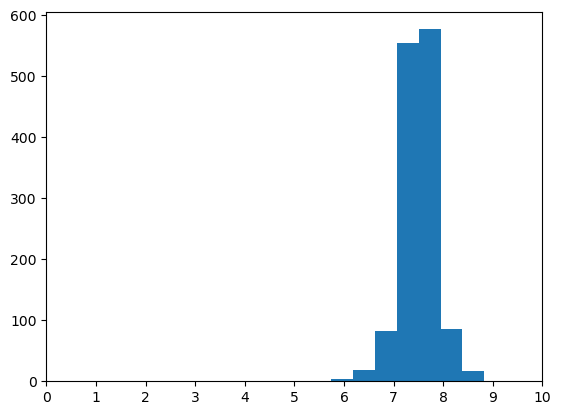

In [9]:
plt.hist(coffee_data.Flavor, bins = 20)
plt.xlim(0, 10)
plt.xticks(range(11))
plt.show()

Може да опитаме да направим същото нещо и за други колони.

In [10]:
coffee_data.Region.unique()

array(['guji-hambela', nan, 'oromia', 'oromiya',
       'snnp/kaffa zone,gimbowereda', 'antioquia', 'kona', 'sulawesi',
       'yirgacheffe', 'yunnan', 'gedio', 'san ramon', 'xalapa', 'sidamo',
       'south of minas', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu'

In [11]:
coffee_data.Region.value_counts()

Region
huila                                                                      112
oriente                                                                     80
south of minas                                                              68
kona                                                                        66
veracruz                                                                    35
                                                                          ... 
phahi                                                                        1
mahuixtlan                                                                   1
52 narino (exact location: mattituy; municipal region: florida code 381      1
aceh                                                                         1
kwanza norte province, angola                                                1
Name: count, Length: 356, dtype: int64

# Data Tidying and data Cleaning
Подреждане на данни и почистване на данни

Имаме таблица, която е двумерна и в нея имаме редове и колини. Всеки един ред представлява едно наблюдение. Не случайно наричаме таблицата дейта __сет__ . Редовете трябва да бъдат уникални или недубликирани. И също така един ред отговаря за един цял запис. Колоните ще бъдат основното нещо, което ще гледаме, когато работим в дейта саънс и машийн лърнинг. И това ще бъдат нашите отделни променливи.

Искаме да докараме данните до нормални форми, да ги нормализираме. 

Всяка една колона предтсавлява една променлива, едно измерение. Един запис бидейки комбинация от измерението с неговите коефициенти ще представлява, можем да го наречем вектор в пространството, можем да го наречем и точка в пространството.

Една клетка съдържа стойността за един запис и една променлива. В клетката трябва да имаме скаларни величини. Допустимо е да бъде една стойност (булеан, стринг, интиджър), а не колекция от стойности.

Една таблица (един дейта сет) в идеалния случей представлява матрица от данните. И формата в който са данните задължително трябва да спазва тези изисквания. 

Има разлика между структурирани/неструктурирани данни и подредени/неподредени данни.

Ако искаме да добавим нов запис трябва да добавим един цял ред. Първо трябва да идентифицираме какво означава един запис, трябва да идентифицираме променливите, които са в него.

In [12]:
pew = pd.read_csv("pew.csv")

In [13]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Можем да направим операцията, която е обратна на създаването на pivot table и се нарича melt:

In [14]:
pew.melt(id_vars = ["religion"], var_name= "income", value_name = "frequency")

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


Това ни връща нов DataFrame. Оригиналният си е pew.

In [15]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Когато правим трансформации на данни е хубаво да си оставяме техни копия. Така ще имаме това по което работим, но няма да сме забравили и оригиналното. Ето така ще запазим трансформацията:

In [16]:
pew_tidy = pew.melt(id_vars = ["religion"], var_name= "income", value_name = "frequency")

И като ги сравним виждаме, че колоните са различни:

In [17]:
pew.columns, pew_tidy.columns

(Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
        '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
       dtype='object'),
 Index(['religion', 'income', 'frequency'], dtype='object'))

In [18]:
pew_tidy.dtypes

religion     object
income       object
frequency     int64
dtype: object

Хубаво е, ако променливи са категорийни да окажем, че това е така.

In [19]:
pew_tidy.religion = pew_tidy.religion.astype("category")
pew_tidy.income = pew_tidy.income.astype("category")

Можем да направим всяко едно, което е object да стане category. И когато го извикаме пак това нещо виждаме, че това вече е категори:

In [20]:
pew_tidy.dtypes

religion     category
income       category
frequency       int64
dtype: object

In [21]:
pew_tidy.religion.unique()

['Agnostic', 'Atheist', 'Buddhist', 'Catholic', 'Don’t know/refused', ..., 'Orthodox', 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated']
Length: 18
Categories (18, object): ['Agnostic', 'Atheist', 'Buddhist', 'Catholic', ..., 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated']

Това работи по същия начин, само че вътрешно pandas ги кодира като числа, което в много голяма степен намалява паметта, която заема един DataFrame:

In [22]:
pew_tidy.religion.value_counts()

religion
Agnostic                   10
Atheist                    10
Other World Religions      10
Other Faiths               10
Other Christian            10
Orthodox                   10
Muslim                     10
Mormon                     10
Mainline Prot              10
Jewish                     10
Jehovah's Witness          10
Historically Black Prot    10
Hindu                      10
Evangelical Prot           10
Don’t know/refused         10
Catholic                   10
Buddhist                   10
Unaffiliated               10
Name: count, dtype: int64

Можем да видим вснощност това с метода memory_usage:

In [23]:
pew_tidy.memory_usage()

Index         132
religion      880
income        560
frequency    1440
dtype: int64

__%matplotlib inline__ помага да интегрираме графиките заедно с кода, който ги генерира. Просто влиза като част от notebook. Картинката влиза като base64 кодиран string.

### Следващият пример е свързан с проучване за туберкулоза в различни възрастови групи:

In [24]:
tb = pd.read_csv("tb.csv")

In [25]:
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


NaN - Not a Number се получава когато правим операция върху числа, която е невалидна.

Ако имаме np.inf делено на 5, получаваме inf:

In [26]:
np.inf / 5

inf

Обаче ако имаме np.inf разделено на np.inf получаваме NaN:

In [27]:
np.inf / np.inf

nan

Ако имаме inf върху 0, получаваме грешка:

In [28]:
# np.inf / 0     
# ZeroDivisionError: float division by zero

In [29]:
0 / np.inf

0.0

In [30]:
# 0 / 0
# ZeroDivisionError: float division by zero

NaN в pandas означава стойност, която липсва.

NaN много често не работи, много често за различните операции, които вършим, в това число и за моделирането на данни, NaN дава грешки. Така, че ще се наложи в някой момент да се справим с данни, които липсват по някакъв начин - може да ги махнем, може да ги заменим с нещо, можем да ги анализираме по друг начин.

Нека видим шейп и колоните в таблицата:

In [31]:
tb.shape

(5769, 22)

In [32]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

Когато събираме NaN и цели числа получаваме float data type.

In [33]:
tb[(tb.year == 1989) & (tb.iso2 == "AD")].values

array([['AD', 1989, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)

Навсякъде имаме липсващи стойности. Тук направо целият ред липсва. Редът е там само защото за тази година трябва да има нещо. Странно е един цял ред да липсва.

In [34]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


count казва колко са тези, които са нелипсващи.

1. Първо идентифицираме държавата
2. После годината
3. Може би е пола на човека
4. Въпрос на вкус как искаме да третираме възраста.

In [35]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases")

In [36]:
tb_tidy.head()

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


Понеже тази променлива е стринг и имаме достъп до всички операции, които могат да се правят върху стринг.

In [37]:
tb_tidy.sex_and_age.str

In [38]:
tb_tidy.sex_and_age.str.slice(0, 1)

0         m
1         m
2         m
3         m
4         m
         ..
115375    f
115376    f
115377    f
115378    f
115379    f
Name: sex_and_age, Length: 115380, dtype: object

Проверяваме дали работи:

In [39]:
tb_tidy.sex_and_age.str.slice(0, 1).unique()

array(['m', 'f'], dtype=object)

In [40]:
tb_tidy.sex_and_age.str.slice(1).unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

Запазваме в нова колона:

In [41]:
tb_tidy["gender"] = tb_tidy.sex_and_age.str.slice(0, 1)

In [42]:
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)

In [43]:
tb_tidy

,iso2,year,sex_and_age,cases,gender,age_group
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04
...,...,...,...,...,...,...
115375,ZW,2004,fu,NaN,f,u
115376,ZW,2005,fu,NaN,f,u
115377,ZW,2006,fu,NaN,f,u
115378,ZW,2007,fu,NaN,f,u


Тук проблемът е че имаме една колона в повече и затова ще в премахнем:

In [44]:
tb_tidy = tb_tidy.drop(columns = ["sex_and_age"])

In [45]:
tb_tidy

,iso2,year,cases,gender,age_group
0,AD,1989,NaN,m,04
1,AD,1990,NaN,m,04
2,AD,1991,NaN,m,04
3,AD,1992,NaN,m,04
4,AD,1993,NaN,m,04
...,...,...,...,...,...
115375,ZW,2004,NaN,f,u
115376,ZW,2005,NaN,f,u
115377,ZW,2006,NaN,f,u
115378,ZW,2007,NaN,f,u


In [46]:
tb_tidy.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115380.0,1994.229329,8.422571,1980.0,1987.0,1994.0,2002.0,2008.0
cases,35750.0,609.378881,3278.187960,0.0,4.0,36.0,245.0,90498.0


Да премахнем всеки един ред където има NaN:

In [47]:
tb_tidy_no_missing = tb_tidy.dropna()

In [48]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


Вече можем да направим някакво средно:

In [49]:
tb_tidy_no_missing.cases.mean()

611.1249437443745

In [50]:
tb_tidy_no_missing[tb_tidy_no_missing.iso2 == "BG"].cases.mean()

58.46478873239437

Можем да видим първо, че всяко едно от age_group е стринг. Можем да поискаме какво е разпределнието по дължини.

In [51]:
tb_tidy_no_missing.age_group.str.len().value_counts()

age_group
4    23912
2     5561
3     5536
1      543
Name: count, dtype: int64

In [52]:
tb_tidy_no_missing.age_group.str.slice(0, 2)

15        04
16        04
18        04
42        04
43        04
          ..
115195     u
115269     u
115323     u
115350     u
115379     u
Name: age_group, Length: 35552, dtype: object

Apply е начин да приложим функция върху всеки един ред, ако подам таблица или всяка една стойност, ако подам колоната. 

In [53]:
tb_tidy_no_missing.age_group.apply(lambda x: x)

15        04
16        04
18        04
42        04
43        04
          ..
115195     u
115269     u
115323     u
115350     u
115379     u
Name: age_group, Length: 35552, dtype: object

In [54]:
def process_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    # Put a dash before the last two digits
    return f"{age_group[:-2]}-{age_group[-2:]}"

In [55]:
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(process_age_group)

C:\Users\ggeorgieva.HAEMIMONT\AppData\Local\Temp\ipykernel_10824\690891332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(process_age_group)


In [56]:
tb_tidy_no_missing.age_group

15            0-4
16            0-4
18            0-4
42            0-4
43            0-4
           ...   
115195    unknown
115269    unknown
115323    unknown
115350    unknown
115379    unknown
Name: age_group, Length: 35552, dtype: object

In [57]:
tb_tidy_no_missing.age_group.unique()

array(['0-4', '5-14', '0-14', '15-24', '25-34', '35-44', '45-54', '55-64',
       '65+', 'unknown'], dtype=object)

In [58]:
tb_tidy_no_missing.age_group.str.split("-")
# tb_tidy_no_misssing.age_group.str.split("-", expand = True)  в нова колона

15           [0, 4]
16           [0, 4]
18           [0, 4]
42           [0, 4]
43           [0, 4]
            ...    
115195    [unknown]
115269    [unknown]
115323    [unknown]
115350    [unknown]
115379    [unknown]
Name: age_group, Length: 35552, dtype: object

In [59]:
tb_tidy_no_missing.gender = tb_tidy_no_missing.gender.astype("category")
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.astype("category")

C:\Users\ggeorgieva.HAEMIMONT\AppData\Local\Temp\ipykernel_10824\1670776853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.gender = tb_tidy_no_missing.gender.astype("category")
C:\Users\ggeorgieva.HAEMIMONT\AppData\Local\Temp\ipykernel_10824\1670776853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.astype("category")


In [60]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,0-4
16,AD,2006,0.0,m,0-4
18,AD,2008,0.0,m,0-4
42,AE,2006,0.0,m,0-4
43,AE,2007,0.0,m,0-4
...,...,...,...,...,...
115195,VU,2008,0.0,f,unknown
115269,YE,2008,0.0,f,unknown
115323,ZA,2008,0.0,f,unknown
115350,ZM,2008,0.0,f,unknown


Тук ще направим субсет или в случая просто пренареждане:

In [61]:
tb_tidy_no_missing[["iso2", "year", "gender", "age_group", "cases"]]

,iso2,year,gender,age_group,cases
15,AD,2005,m,0-4,0.0
16,AD,2006,m,0-4,0.0
18,AD,2008,m,0-4,0.0
42,AE,2006,m,0-4,0.0
43,AE,2007,m,0-4,0.0
...,...,...,...,...,...
115195,VU,2008,f,unknown,0.0
115269,YE,2008,f,unknown,0.0
115323,ZA,2008,f,unknown,0.0
115350,ZM,2008,f,unknown,0.0


Сортираме ги по държава:

In [62]:
tb_tidy_no_missing.sort_values("iso2")

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,0-4
17320,AD,2003,0.0,m,15-24
17319,AD,2002,0.0,m,15-24
17317,AD,2000,0.0,m,15-24
17316,AD,1999,0.0,m,15-24
...,...,...,...,...,...
34607,ZW,2002,1662.0,m,35-44
28844,ZW,2008,0.0,m,25-34
28843,ZW,2007,3693.0,m,25-34
103840,ZW,2007,213.0,f,55-64


Или сортираме по държава и после по година:

In [63]:
tb_tidy_no_missing = tb_tidy_no_missing.sort_values(["iso2", "year"])

In [64]:
tb_tidy_no_missing = tb_tidy_no_missing.reset_index(drop = True)

In [65]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
0,AD,1996,0.0,m,0-14
1,AD,1996,0.0,m,15-24
2,AD,1996,0.0,m,25-34
3,AD,1996,4.0,m,35-44
4,AD,1996,1.0,m,45-54
...,...,...,...,...,...
35547,ZW,2008,2890.0,f,35-44
35548,ZW,2008,467.0,f,45-54
35549,ZW,2008,174.0,f,55-64
35550,ZW,2008,105.0,f,65+


In [66]:
# tb_tidy_no_misssing = tb_tidy_no_misssing.cases.astype(int)
tb_tidy_no_missing.to_csv("tb_tidy.csv", index = None)

In [67]:
weather_data = pd.read_csv("weather.csv")

In [68]:
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [69]:
weather_data.loc[2, "d31"] = 23

In [70]:
weather_data_tidy = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day", value_name = "value")

In [71]:
weather_data_tidy.columns

Index(['id', 'year', 'month', 'element', 'day', 'value'], dtype='object')

In [72]:
weather_data_tidy.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

Виждаме, че day започва с d , а това d не ни трябва.

In [73]:
weather_data_tidy_sliced = weather_data_tidy.day.str.slice(1)

In [74]:
weather_data_tidy_sliced

0       1
1       1
2       1
3       1
4       1
       ..
677    31
678    31
679    31
680    31
681    31
Name: day, Length: 682, dtype: object

Сега може би е моментът да махнем тези, които не съществуват:

In [75]:
weather_data_tidy = weather_data_tidy.dropna()

Превръщаме таблицата от Series тип в DataFrame тип:

In [76]:
if isinstance(weather_data_tidy, pd.Series):
    weather_data_tidy = weather_data_tidy.to_frame()

Сега ще направим операцията, която от tmax и tmin, които не са колони ще изнесе колони. И това става с операцията pivot_table. Тогава трябва да кажем кои са колоните и стойностите които ще вземем.

In [77]:
weather_data_tidy = weather_data_tidy.pivot_table(index = ["id", "year", "month"], columns = "element", values = "value")

In [78]:
weather_data_tidy = weather_data_tidy.reset_index()

In [79]:
weather_data_tidy

element,id,year,month,tmax,tmin
0,MX17004,2010,1,27.800000,14.500000
1,MX17004,2010,2,26.800000,13.225000
2,MX17004,2010,3,32.566667,16.200000
3,MX17004,2010,4,36.300000,16.700000
4,MX17004,2010,5,33.200000,18.200000
5,MX17004,2010,6,29.050000,17.750000
6,MX17004,2010,7,29.250000,17.000000
7,MX17004,2010,8,28.271429,15.842857
8,MX17004,2010,10,28.900000,13.080000
9,MX17004,2010,11,28.120000,12.500000


#### Прочитаме нов dataset:

In [80]:
billboard_data = pd.read_csv("billboard.csv")

In [81]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можем да видим кои песни са стоели най-дълго в класацията:

In [82]:
billboard_data[billboard_data.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
billboard_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,317.0,2000.000000,0.000000,2000.0,2000.00,2000.0,2000.0,2000.0
wk1,317.0,79.958991,14.686865,15.0,74.00,81.0,91.0,100.0
wk2,312.0,71.173077,18.200443,8.0,63.00,73.0,84.0,100.0
wk3,307.0,65.045603,20.752302,6.0,53.00,66.0,79.0,100.0
wk4,300.0,59.763333,22.324619,5.0,44.75,61.0,76.0,100.0
...,...,...,...,...,...,...,...,...
wk72,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk74,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можем да вземем последните 15 колони:

In [84]:
last_columns = billboard_data.columns[-15:]

In [85]:
billboard_data[last_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"])

,year,artist,track,time,date.entered,variable,value
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [87]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"], var_name = "week", value_name = "pos")

,year,artist,track,time,date.entered,week,pos
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [89]:
billboard_data = billboard_data.melt(
    id_vars = ["year", "artist", "track", "time", "date.entered"], 
    var_name = "week", 
    value_name = "position"
)

In [90]:
billboard_data = billboard_data.dropna()

In [91]:
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [92]:
billboard_data.week.unique()

array(['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9',
       'wk10', 'wk11', 'wk12', 'wk13', 'wk14', 'wk15', 'wk16', 'wk17',
       'wk18', 'wk19', 'wk20', 'wk21', 'wk22', 'wk23', 'wk24', 'wk25',
       'wk26', 'wk27', 'wk28', 'wk29', 'wk30', 'wk31', 'wk32', 'wk33',
       'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39', 'wk40', 'wk41',
       'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48', 'wk49',
       'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65'],
      dtype=object)

Тъй като week навсякъде започва с "w" ще го премахнем:

In [93]:
billboard_data.week = billboard_data.week.str.slice(2).astype(int)

In [94]:
billboard_data.position = billboard_data.position.astype(int)

In [95]:
billboard_data.position

0        87
1        91
2        81
3        76
4        57
         ..
19716    50
19833    45
20033    50
20150    50
20350    49
Name: position, Length: 5307, dtype: int32

Конверираме колоната в тип datetime:

In [96]:
billboard_data["date.entered"] = pd.to_datetime(billboard_data["date.entered"])

In [97]:
billboard_data.dtypes

year                     int64
artist                  object
track                   object
time                    object
date.entered    datetime64[ns]
week                     int32
position                 int32
dtype: object

In [98]:
pd.Timedelta(7)

Timedelta('0 days 00:00:00.000000007')

7 са наносекунди

In [99]:
pd.Timedelta(7, "day")

Timedelta('7 days 00:00:00')

In [100]:
pd.Timedelta(1, "w")

Timedelta('7 days 00:00:00')

In [101]:
intervals = billboard_data.week.apply(lambda x: pd.Timedelta(x - 1, "w"))

In [102]:
billboard_data["date"] = billboard_data["date.entered"] + intervals

In [103]:
billboard_data

,year,artist,track,time,date.entered,week,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [104]:
billboard_data[billboard_data.track == "Higher"]

,year,artist,track,time,date.entered,week,position,date
62,2000,Creed,Higher,5:16,1999-09-11,1,81,1999-09-11
379,2000,Creed,Higher,5:16,1999-09-11,2,77,1999-09-18
696,2000,Creed,Higher,5:16,1999-09-11,3,73,1999-09-25
1013,2000,Creed,Higher,5:16,1999-09-11,4,63,1999-10-02
1330,2000,Creed,Higher,5:16,1999-09-11,5,61,1999-10-09
1647,2000,Creed,Higher,5:16,1999-09-11,6,58,1999-10-16
1964,2000,Creed,Higher,5:16,1999-09-11,7,56,1999-10-23
2281,2000,Creed,Higher,5:16,1999-09-11,8,52,1999-10-30
2598,2000,Creed,Higher,5:16,1999-09-11,9,56,1999-11-06
2915,2000,Creed,Higher,5:16,1999-09-11,10,57,1999-11-13


In [105]:
billboard_data = billboard_data.drop(columns = ["date.entered", "week"])

In [106]:
billboard_data = billboard_data[["year", "artist", "track", "time", "date", "position"]]

In [107]:
billboard_data

,year,artist,track,time,date,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,2000-11-18,50
19833,2000,Lonestar,Amazed,4:25,2000-08-12,45
20033,2000,Creed,Higher,5:16,2000-11-25,50
20150,2000,Lonestar,Amazed,4:25,2000-08-19,50


Тук започваме да питаме някакви неща. Вече имаме един перфектно подреден и почистен dataset.

In [108]:
billboard_data[billboard_data.date.dt.year == 2001]

,year,artist,track,time,date,position
612,2000,Tuesday,I Know,4:06,2001-01-06,98
707,2000,De La Soul,All Good?,5:02,2001-01-06,100
1010,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-06,96
1327,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-13,99
1644,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-20,99
...,...,...,...,...,...,...
15218,2000,3 Doors Down,Kryptonite,3:53,2001-03-10,28
15535,2000,3 Doors Down,Kryptonite,3:53,2001-03-17,33
15852,2000,3 Doors Down,Kryptonite,3:53,2001-03-24,42
16169,2000,3 Doors Down,Kryptonite,3:53,2001-03-31,42


Като групираме по artist може да поискаме value_counts:

In [109]:
billboard_data.groupby("track").artist.value_counts()

track                    artist          
(Hot S**t) Country G...  Nelly               34
3 Little Words           Nu Flavor            9
911                      Jean, Wyclef        19
A Country Boy Can Su...  Brock, Chad          3
A Little Gasoline        Clark, Terri         6
                                             ..
You Won't Be Lonely ...  Cyrus, Billy Ray    13
You'll Always Be Lov...  Brooks & Dunn       19
You're A God             Vertical Horizon    21
Your Everything          Urban, Keith        16
www.memory               Jackson, Alan       15
Name: count, Length: 317, dtype: int64

In [110]:
billboard_data = billboard_data.reset_index()

In [111]:
billboard_data

,index,year,artist,track,time,date,position
0,0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...,...
5302,19716,2000,Creed,Higher,5:16,2000-11-18,50
5303,19833,2000,Lonestar,Amazed,4:25,2000-08-12,45
5304,20033,2000,Creed,Higher,5:16,2000-11-25,50
5305,20150,2000,Lonestar,Amazed,4:25,2000-08-19,50


Можем да потърсим кои песни са били на първо място:

In [112]:
billboard_data[billboard_data.position == 1]

,index,year,artist,track,time,date,position
1697,1776,2000,Madonna,Music,3:45,2000-09-16,1
1972,2093,2000,Madonna,Music,3:45,2000-09-23,1
2087,2232,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-15,1
2234,2410,2000,Madonna,Music,3:45,2000-09-30,1
2294,2482,2000,Sisqo,Incomplete,3:52,2000-08-12,1
2347,2549,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-22,1
2394,2610,2000,Destiny's Child,Independent Women Pa...,3:38,2000-11-18,1
2490,2727,2000,Madonna,Music,3:45,2000-10-07,1
2540,2788,2000,Santana,"Maria, Maria",4:18,2000-04-08,1
2548,2799,2000,Sisqo,Incomplete,3:52,2000-08-19,1


In [113]:
billboard_data[billboard_data.position == 1].artist.unique()

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

Кои са артистите с най-много песни на 1-во място:

In [114]:
billboard_data[billboard_data.position == 1].artist.value_counts()

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

#### Прочитаме данни от линк:

In [115]:
weather_data_from_link = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [116]:
weather_data_from_link

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [117]:
weather_data_from_link.shape

(366, 23)

In [118]:
weather_data_from_link.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [119]:
weather_data_from_link.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
 "mean_dew", "min_dew", "max_humidity", "mean_humidity",
 "min_humidity", "max_pressure", "mean_pressure",
 "min_pressure", "max_visibility", "mean_visibility",
 "min_visibility", "max_wind", "mean_wind", "max_gusts",
 "precipitation", "cloud_cover", "events", "wind_dir"]

In [120]:
weather_data_from_link

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [121]:
weather_data_from_link.date = pd.to_datetime(weather_data_from_link.date)

In [122]:
weather_data_from_link.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [123]:
weather_data_from_link.loc[weather_data_from_link.precipitation == "T", "precipitation"] = 1e-6

И когато поискаме unique() вече не трябва да има стойности "T": 

In [124]:
weather_data_from_link.precipitation.unique()

array(['0.00', 1e-06, '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [125]:
weather_data_from_link.precipitation = weather_data_from_link.precipitation.astype(float)

In [126]:
weather_data_from_link

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.000000,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,0.000001,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.030000,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.000000,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.000000,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-03-06,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.040000,8,Snow,314
362,2013-03-07,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.000000,8,NaN,342
363,2013-03-08,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.000000,1,NaN,90
364,2013-03-09,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,0.000001,2,NaN,141


In [127]:
weather_data_from_link.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

By default value_counts изпуска NaN стойностите, затова трябва да му сложим dropna = False

In [128]:
weather_data_from_link.events.value_counts(dropna = False)

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

Извод: че най-много дни нямат никакви интересни събития за тях.

<Axes: >

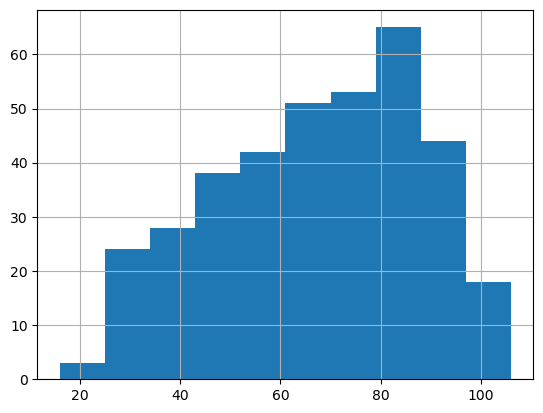

In [129]:
weather_data_from_link.max_temp.hist()

Хистограмата по-горе е на pandas, а тази отдолу на matplotlib.
Това са максималните температури.

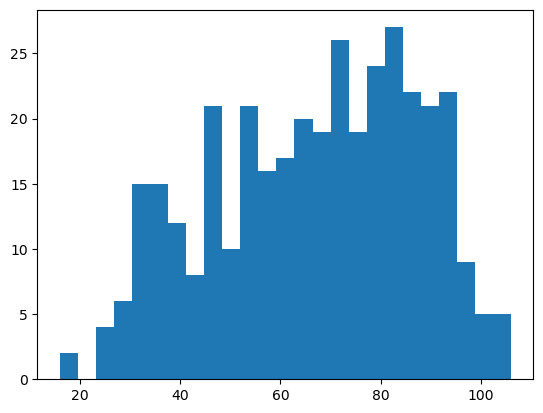

In [130]:
plt.hist(weather_data_from_link.max_temp, bins = 25)
plt.show()

Можем да видим максималните температури за юни месец:

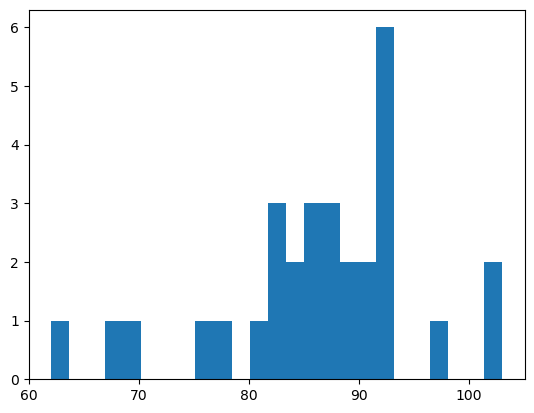

In [131]:
plt.hist(weather_data_from_link[weather_data_from_link.date.dt.month == 6].max_temp, bins = 25)
plt.show()

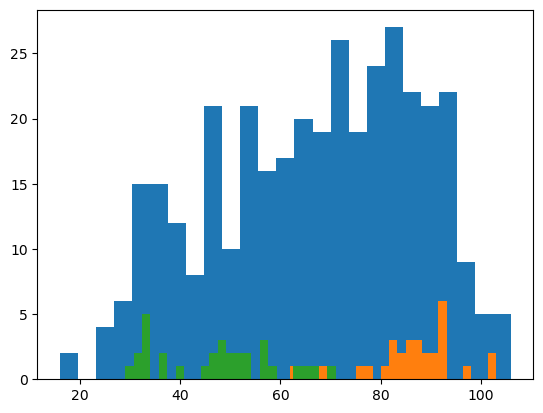

In [132]:
plt.hist(weather_data_from_link.max_temp, bins = 25)
plt.hist(weather_data_from_link[weather_data_from_link.date.dt.month == 6].max_temp, bins = 25)
plt.hist(weather_data_from_link[weather_data_from_link.date.dt.month == 12].max_temp, bins = 25)

plt.show()

In [133]:
weather_data_from_link = weather_data_from_link.set_index("date")

In [134]:
weather_data_from_link.index

DatetimeIndex(['2012-03-10', '2012-03-11', '2012-03-12', '2012-03-13',
               '2012-03-14', '2012-03-15', '2012-03-16', '2012-03-17',
               '2012-03-18', '2012-03-19',
               ...
               '2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

Resample означава да вземем няколко дати едновременно и да решим какво да ги правим.

In [135]:
weather_data_from_link.resample("w")

Можем да поискаме средната минимална температура за всяка една седмица:

In [136]:
weather_data_from_link.resample("w").min_temp.mean()

date
2012-03-11    27.000000
2012-03-18    51.714286
2012-03-25    54.857143
2012-04-01    46.714286
2012-04-08    45.571429
2012-04-15    39.714286
2012-04-22    41.142857
2012-04-29    41.428571
2012-05-06    62.285714
2012-05-13    50.857143
2012-05-20    52.857143
2012-05-27    58.714286
2012-06-03    54.142857
2012-06-10    51.142857
2012-06-17    59.000000
2012-06-24    62.428571
2012-07-01    64.857143
2012-07-08    69.285714
2012-07-15    65.428571
2012-07-22    68.000000
2012-07-29    69.000000
2012-08-05    64.142857
2012-08-12    58.285714
2012-08-19    55.142857
2012-08-26    54.857143
2012-09-02    64.857143
2012-09-09    62.571429
2012-09-16    51.000000
2012-09-23    43.857143
2012-09-30    50.857143
2012-10-07    45.571429
2012-10-14    37.142857
2012-10-21    42.857143
2012-10-28    48.571429
2012-11-04    32.714286
2012-11-11    33.714286
2012-11-18    24.285714
2012-11-25    29.857143
2012-12-02    32.428571
2012-12-09    42.142857
2012-12-16    27.000000
2012-12-23 

Resample прави group by само че групира по дати, които са последователни.

In [137]:
weather_data_from_link.resample(pd.Timedelta(3, "day")).min_temp.mean()

date
2012-03-10    35.666667
2012-03-13    50.666667
2012-03-16    52.333333
2012-03-19    58.000000
2012-03-22    52.666667
                ...    
2013-02-24    26.333333
2013-02-27    31.666667
2013-03-02    21.666667
2013-03-05    28.666667
2013-03-08    35.333333
Freq: 3D, Name: min_temp, Length: 122, dtype: float64

И пак можем да поискаме минимална средна температура с друг метод, но този път имаме за всеки един ден:

In [138]:
weather_data_from_link.rolling(pd.Timedelta(3, "day")).min_temp.mean()

date
2012-03-10    24.000000
2012-03-11    27.000000
2012-03-12    35.666667
2012-03-13    44.333333
2012-03-14    49.000000
                ...    
2013-03-06    25.666667
2013-03-07    28.666667
2013-03-08    26.666667
2013-03-09    28.000000
2013-03-10    35.333333
Name: min_temp, Length: 366, dtype: float64

#### Сега да си поиграем пак с другите datasets:

In [139]:
coffee_data.Owner.unique()

array(['metad plc', 'grounds for health admin', 'yidnekachew dabessa',
       'ji-ae ahn', 'hugo valdivia', 'ethiopia commodity exchange',
       'diamond enterprise plc', 'mohammed lalo',
       'cqi q coffee sample representative', 'yunnan coffee exchange',
       'essencecoffee', 'the coffee source inc.', 'roberto licona franco',
       'nucoffee', 'kabum trading company', 'bismarck castro',
       'lin, che-hao krude 林哲豪', 'nora zeas', 'specialty coffee-korea',
       'francisco a mena', 'hider abamecha', 'daniel magu',
       'kona pacific farmers cooperative', 'itdp international',
       'jacques pereira carneiro', 'jungle estate',
       'great lakes coffee uganda', 'lusso lab', 'afca',
       'juan luis alvarado romero', 'kawacom uganda ltd',
       'exportadora de cafe condor s.a', 'gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export',
       'seid damtew coffee planataion', 'dane loraas',
       'colbran coffeelands, ltd.', 'atlantic specialty coff

In [140]:
coffee_data.Owner.str.upper()

0                      METAD PLC
1                      METAD PLC
2       GROUNDS FOR HEALTH ADMIN
3            YIDNEKACHEW DABESSA
4                      METAD PLC
                  ...           
1334                 LUIS ROBLES
1335                 LUIS ROBLES
1336                 JAMES MOORE
1337               CAFE POLITICO
1338               CAFE POLITICO
Name: Owner, Length: 1339, dtype: object

In [142]:
coffee_data.Region

0                        guji-hambela
1                        guji-hambela
2                                 NaN
3                              oromia
4                        guji-hambela
                    ...              
1334                 san juan, playas
1335                 san juan, playas
1336    kwanza norte province, angola
1337                              NaN
1338                              NaN
Name: Region, Length: 1339, dtype: object

### Заменяме NaN данните.
Първи вариант:

In [145]:
tb.fillna(-999) # sentinel value

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,AD,1990,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,AD,1991,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,AD,1992,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,AD,1993,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,-999.0,-999.0,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,-999.0,-999.0,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,-999.0
5765,ZW,2005,-999.0,-999.0,210.0,837.0,2264.0,1855.0,762.0,295.0,...,-999.0,-999.0,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,-999.0
5766,ZW,2006,-999.0,-999.0,215.0,736.0,2391.0,1939.0,896.0,348.0,...,-999.0,-999.0,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,-999.0
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,-999.0


Втори вариант:

Този ред променя разпределението на данните.

In [147]:
# imputation
coffee_data.Acidity.fillna(coffee_data.Acidity.mean())

0       8.75
1       8.58
2       8.42
3       8.42
4       8.50
        ... 
1334    7.58
1335    7.75
1336    7.42
1337    7.17
1338    6.83
Name: Acidity, Length: 1339, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   3.,  11., 238., 753., 303.,  27.]),
 array([0.   , 0.429, 0.858, 1.287, 1.716, 2.145, 2.574, 3.003, 3.432,
        3.861, 4.29 , 4.719, 5.148, 5.577, 6.006, 6.435, 6.864, 7.293,
        7.722, 8.151, 8.58 ]),
 <BarContainer object of 20 artists>)

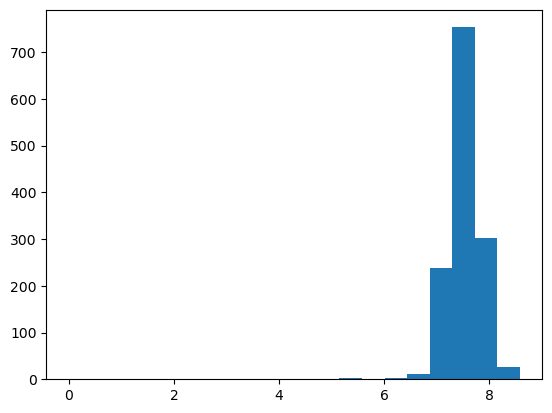

In [150]:
plt.hist(coffee_data.Body, bins = 20)

In [152]:
coffee_data.Balance[coffee_data.Balance > 0].mean()

7.523632286995516

In [153]:
pd.qcut(coffee_data.Balance, 5)

0         (7.75, 8.75]
1         (7.75, 8.75]
2         (7.75, 8.75]
3         (7.75, 8.75]
4         (7.75, 8.75]
             ...      
1334      (7.75, 8.75]
1335    (-0.001, 7.25]
1336    (-0.001, 7.25]
1337    (-0.001, 7.25]
1338    (-0.001, 7.25]
Name: Balance, Length: 1339, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.25] < (7.25, 7.5] < (7.5, 7.58] < (7.58, 7.75] < (7.75, 8.75]]